In [3]:
#bibliotecas padrão 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas_profiling as pf 

sns.set()

#skelarn preprocessing 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer  

#tensforflow model 
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

#vizualizer 

from keras.utils import plot_model


Este estudo teórico visa identificar o potencial de previsão de modelos de Deep Learning construídos sobre Redes Neurais (Neural Networks) em bases de dados de crédtio bancário. 

Vale ressaltar que nenhuma informação contida neste documento é real, e portanto, não deve ser levada em conta para se tomar qualquer tipo de decisão de negócios. A base de dados foi disponibilizada abertamento pelo usuário 'LaoTse' no portal Keagle  

Link: https://www.kaggle.com/datasets/laotse/credit-risk-dataset?select=credit_risk_dataset.csv

-------------------------

*Passo 1 - Importar a base de Dados*

Neste primeiro passo, deve-se importar os dados fornecidos em csv e obter uma visualização prévia de como as informações continuas no arquivo estão dispostas. Para isso utilizaremos o 'Pandas Profiling' que é uma ferramenta muito útil para sumarizar Dataframes compilados no pandas

In [4]:
credit_data = pd.read_csv('credit_risk_dataset.csv')

In [5]:
credit_data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


--------------

Passo 2 - Análise Exploratória de dados 

Para grantir que os dados estão estruturados da melhor forma, recomenda-se fazer uma análise exploratória de dados  com o intuito de confirmar alguns hipoteses chaves para o sucesso da modelagem:

. Existem dados ausentes? se sim, quais?

. O formato dos dados estam corretamentes especificados?

. Existem outliers ou 'noisy data' que precisam ser tratados? 

. Existe possibilidades evidentes de 'Data Leakage?' 

In [6]:
#Visualização da base de dados

credit_data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [7]:
#Descrição da base de dados (variáveis numéricas)

credit_data.select_dtypes(exclude = 'object').describe().round(2)



,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [8]:
#Descrição da base de dados (variáveis categóricas)

credit_data.select_dtypes(include = 'object').describe().round(2)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [9]:
#Tipo de dados de cada coluna

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
#Dados ausêntes

credit_data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Ao longo da pesquisa exploratória, foi constatado que o principal problema são os dados ausentes em duas colunas: 

.person_emp_lenght (tempo que o indivíduo permaneceu empregado)

.loan_int_rate (taxa de juros do empréstimo)

--------------------------------

Passo 3 - Preprocessing e Data Transforming

Esta etapa viza resolver os problemas que especificamos antes. Para resolver o problema de Missing Data, utilizaremos o método de imputação de dados através do algorítimo K-Nearest Neighbors, que preenche as informações ausentes com base em uma análise de pares

Outro passo importante é tratar as variáveis categorias e transformá-las em 'Dummies' numéricas. Para isso utilizaremos o método pandas.get_dummies() para gerar as colunas binárias

Por fim deve-se normalizar os dados, e para isso utilizaremos o Standard Scaler do pacote sklearn, que transforma os dados subtraindo cada ocorrência pela média da coluna e logo após, dividindo pelo seu respectivo desvio padrão


In [11]:
imputer = KNNImputer()

person_emp_length = imputer.fit_transform(credit_data['person_emp_length'].values.reshape(-1,1))
person_emp_length        

array([[123.],
       [  5.],
       [  1.],
       ...,
       [  3.],
       [  5.],
       [  2.]])

In [12]:
imputer = KNNImputer()

loan_int_rate = imputer.fit_transform(credit_data['loan_int_rate'].values.reshape(-1,1))
loan_int_rate                  

array([[16.02],
       [11.14],
       [12.87],
       ...,
       [10.99],
       [11.48],
       [ 9.99]])

In [13]:
credit_data['person_emp_length'] = person_emp_length
credit_data['loan_int_rate'] = loan_int_rate

In [14]:
#Corrigimos, com sucesso, os problemas de valores ausentes

credit_data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
#Geração de Dummies

credit_data.select_dtypes(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [16]:
credit_data =  pd.get_dummies(credit_data)
credit_data.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0
6,26,77100,8.0,35000,12.42,1,0.45,3,0,0,...,0,0,1,0,0,0,0,0,1,0
7,24,78956,5.0,35000,11.11,1,0.44,4,0,0,...,0,0,1,0,0,0,0,0,1,0
8,24,83000,8.0,35000,8.90,1,0.42,2,0,0,...,0,1,0,0,0,0,0,0,1,0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,0,...,1,0,0,0,1,0,0,0,1,0


In [17]:
credit_data['Loan_status_1'] = np.where(credit_data['loan_status'] == 1, 1, 0) #coluna de positivo para inadimplência
credit_data['Loan_status_2'] = np.where(credit_data['loan_status'] == 0, 1, 0) #coluna de negativo para inadimplência

In [18]:
credit_data.drop('loan_status', inplace= True, axis= 1)

In [19]:
#base transformada

credit_data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,Loan_status_1,Loan_status_2
0,22,59000,123.0,35000,16.02,0.59,3,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,1,0,0,0,0,0,1,0,0,1
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,1,0,0,...,0,1,0,0,0,0,1,0,0,1
32577,54,120000,4.0,17625,7.49,0.15,19,1,0,0,...,0,0,0,0,0,0,1,0,0,1
32578,65,76000,3.0,35000,10.99,0.46,28,0,0,0,...,1,0,0,0,0,0,1,0,1,0
32579,56,150000,5.0,15000,11.48,0.10,26,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [20]:
#Dividimos os dados entre as variáveis target e as features do modelo, além de aplicar o Standard Scaller

predictors = credit_data.drop(['Loan_status_1','Loan_status_2'], axis= 1)
target =credit_data[['Loan_status_1','Loan_status_2']]

In [21]:
scaler = StandardScaler()

predictors_scaled = scaler.fit_transform(predictors)
predictors_scaled = pd.DataFrame(predictors_scaled).round(2)
predictors_scaled.columns = predictors.columns

----------------

*Passo Final - Construir o modelo de Redes Neurais *

Com todos os dados transformados e devidamente corrigidos, temos tudo que precisamos para consolidar o modelo de Redes Neurais. Para isso, será uilizado a base do Tensorflow junto com o pacote Keras, feitos especificamente para o propósito de desenvolver aplicações de Deep Learning

In [22]:
n_col = (predictors_scaled.shape[1],)

In [23]:
model = Sequential()

model.add(Dense(250, activation = 'relu', input_shape = n_col))
model.add(Dense(200, activation = 'relu', input_shape = n_col))
model.add(Dense(200, activation = 'relu', input_shape = n_col))
model.add(Dense(2,activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
early_stopping = EarlyStopping(patience= 4)

modelo = model.fit(predictors_scaled,target,
          validation_split = 0.20,
          epochs = 20,
          callbacks = [early_stopping])
modelo

Epoch 1/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.8917 - val_loss: 0.3055 - val_accuracy: 0.8992
Epoch 2/20
815/815 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.9098 - val_loss: 0.2475 - val_accuracy: 0.9194
Epoch 3/20
815/815 [==============================] - 1s 2ms/step - loss: 0.2410 - accuracy: 0.9149 - val_loss: 0.2430 - val_accuracy: 0.9153
Epoch 4/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2344 - accuracy: 0.9177 - val_loss: 0.2553 - val_accuracy: 0.9147
Epoch 5/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2303 - accuracy: 0.9192 - val_loss: 0.2415 - val_accuracy: 0.9193
Epoch 6/20
815/815 [==============================] - 1s 2ms/step - loss: 0.2262 - accuracy: 0.9213 - val_loss: 0.2566 - val_accuracy: 0.9208
Epoch 7/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2245 - accuracy: 0.9213 - val_loss: 0.2460 - val_accuracy: 0.9213
Epoch 

In [25]:
acurácia = np.array(modelo.history['val_accuracy'])

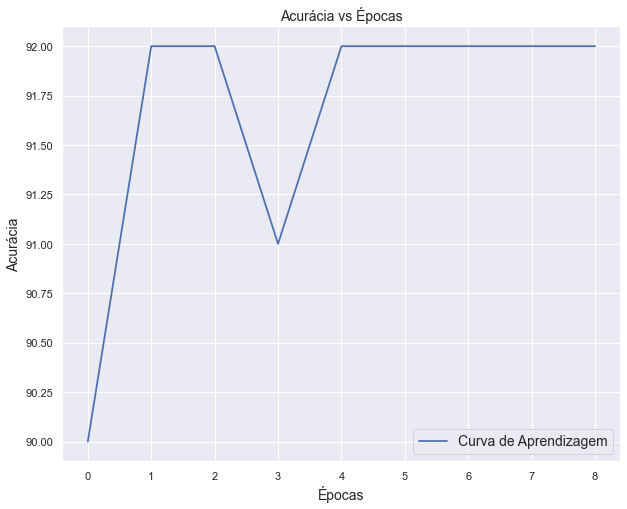

In [26]:
#Curva de aprendizado

plt.figure(figsize= (10,8))
plt.title('Acurácia vs Épocas', fontsize = 14)
plt.ylabel('Acurácia', fontsize = 14)
plt.xlabel('Épocas', fontsize = 14)
plt.plot(acurácia.round(2)*100, linewidth = 1.8, label = 'Curva de Aprendizagem')
plt.legend(fontsize = 14)

In [27]:
model.fit(predictors_scaled,target,
          validation_split = 0.20,
          epochs = 20,
          callbacks = [early_stopping])


Epoch 1/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2174 - accuracy: 0.9241 - val_loss: 0.2604 - val_accuracy: 0.9156
Epoch 2/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2143 - accuracy: 0.9245 - val_loss: 0.3076 - val_accuracy: 0.9162
Epoch 3/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2115 - accuracy: 0.9268 - val_loss: 0.2924 - val_accuracy: 0.9151
Epoch 4/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2112 - accuracy: 0.9265 - val_loss: 0.2639 - val_accuracy: 0.9193
Epoch 5/20
815/815 [==============================] - 2s 2ms/step - loss: 0.2077 - accuracy: 0.9282 - val_loss: 0.2646 - val_accuracy: 0.9176


In [28]:
predições = model.predict(predictors_scaled)

1019/1019 [==============================] - 1s 1ms/step


In [29]:
#Exemplo de aplicação

pd.DataFrame({ 
              'Probabilidade de Inadimplência':predições[:,0].round(2)*100,
              'Valor Real': np.where(target.iloc[:,0] ==1,'Inadimplente','Não Inadimplente')
}).head(20)

,Probabilidade de Inadimplência,Valor Real
0,100.0,Inadimplente
1,23.0,Não Inadimplente
2,100.0,Inadimplente
3,100.0,Inadimplente
4,100.0,Inadimplente
5,100.0,Inadimplente
6,100.0,Inadimplente
7,100.0,Inadimplente
8,100.0,Inadimplente
9,58.0,Inadimplente
